In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [12]:
#to import my data

In [13]:
df = pd.read_excel("covid_impact_on_airport_traffic.xlsx")

In [14]:
df.head()

,Unnamed: 0,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,0,Daily,2020-04-03,1,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,1,Daily,2020-04-13,1,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,2,Daily,2020-07-10,1,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,3,Daily,2020-09-02,1,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,4,Daily,2020-10-31,1,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [15]:
#to find out howmany airports are in dataset

In [16]:
len(df.AirportName.unique())

28

In [17]:
#to find out how many different countries

In [18]:
df.Country.unique()


array(['Australia', 'Chile', 'Canada', 'United States of America'],
      dtype=object)

In [19]:
#to remove (the) from the response

In [20]:
df["Country"] = df["Country"].replace("United States of America (the)","United States of America")

In [21]:
#to recall dataset with the new reponse

In [22]:
df.to_excel("covid_impact_on_airport_traffic.xlsx")

In [23]:
#to test Assumptions

In [24]:
#linearity

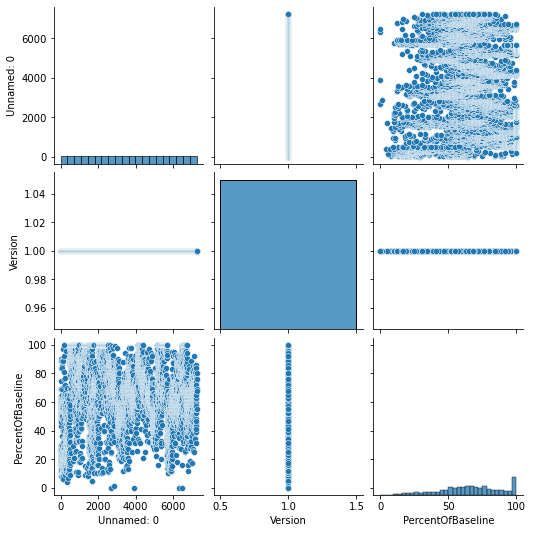

In [25]:
sns.pairplot(df)

In [28]:
#homoscedasticity

In [29]:
x = df['PercentOfBaseline']
y = df['Version']

In [30]:
model = sm.OLS(y,x).fit()

In [31]:
pred_val = model.fittedvalues.copy()
true_val = df['PercentOfBaseline'].values.copy()
residual = true_val - pred_val

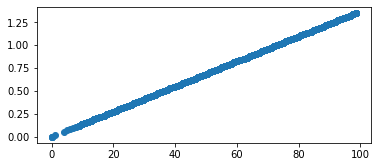

In [32]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

In [33]:
sms.diagnostic.het_breuschpagan(residual, df[['PercentOfBaseline']])

(6904.3804604918005, nan, 146019.52033598567, 0.0)

In [34]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=29.417501150809297, pvalue=8.820281241803072e-180)

(array([  17.,  174.,  294.,  386.,  646., 1089., 1353., 1105.,  855.,
        1328.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

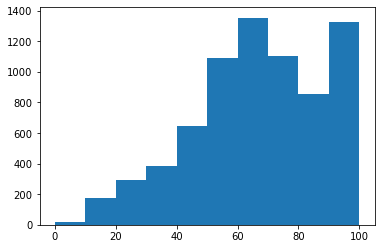

In [37]:
plt.hist(df["PercentOfBaseline"])

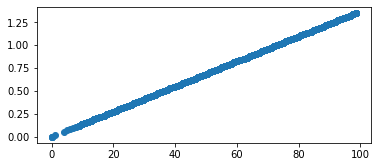

In [38]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

In [39]:
#Screening for Outliers

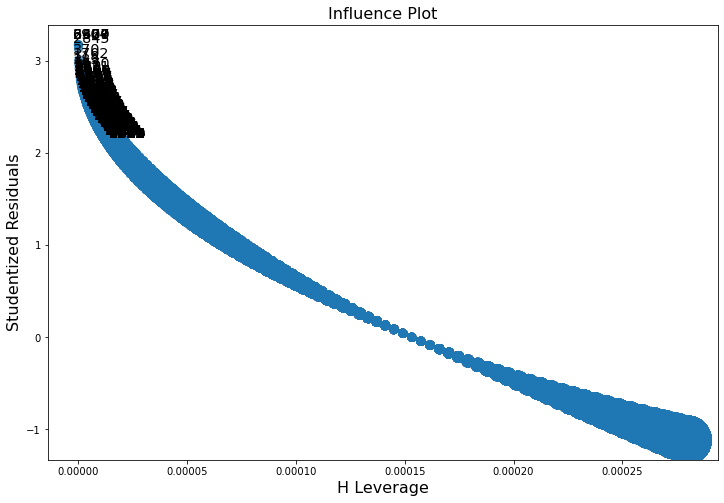

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [42]:
infl = model.get_influence()
print(infl.summary_frame())

      dfb_PercentOfBaseline   cooks_d  standard_resid  hat_diag  \
0                  0.004591  0.000021        0.428835  0.000115   
1                  0.009361  0.000088        1.929503  0.000024   
2                  0.007746  0.000060        0.857608  0.000082   
3                  0.007232  0.000052        2.401131  0.000009   
4                  0.008207  0.000067        2.229630  0.000014   
...                     ...       ...             ...       ...   
7242              -0.003442  0.000012       -0.257233  0.000179   
7243               0.007495  0.000056        0.814731  0.000085   
7244              -0.001090  0.000001       -0.085712  0.000162   
7245               0.002475  0.000006        0.214443  0.000133   
7246               0.002927  0.000009        0.257322  0.000129   

      dffits_internal  student_resid    dffits  
0            0.004591       0.428811  0.004591  
1            0.009359       1.929866  0.009361  
2            0.007746       0.857593  0.007746  

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Version   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          6.571e+04
Date:                Thu, 21 Apr 2022   Prob (F-statistic):                        0.00
Time:                        18:46:49   Log-Likelihood:                         -1914.8
No. Observations:                7247   AIC:                                      3832.
Df Residuals:                    7246   BIC:                                      3839.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PercentOfBaseline     0.0135   5.27e-05    256.342      0.000       0.013       0.014
==============================================================================
Omnibus:                      240.108   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.902
Skew:                           0.331   Prob(JB):                     1.06e-43
Kurtosis:                       2.533   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""